# 18 - Heterogeneous Treatment Effects and Personalization
 
## From Predictions to Causal Inference
 
In the last chapter, we briefly covered Machine Learning models. ML models are tools for what I called predictions or, more technically, estimating the conditional expectation function $E[Y|X]$. In other words, ML is incredibly useful when you want to map from a known input $X$ (like an english sentence, sales this month, brain scan images) to an initially unknown but well-defined output $Y$ (like japanese sentences, sales next month or cancer diagnostics). So, if ML deals with predictions, or estimating $E[Y|X]$, for it to be useful, you have to frame whatever problem you want to solve with ML, as a prediction problem, a problem where estimating $E[Y|X]$ is the key. We walked through such an example in the last chapter. There, we had to predict customer profitability from customer specific features: $E[NetValue|Age, Income, Region]$. This information was very useful, because it allowed us to focus our effort on engaging with profitable customers, while not doing business with non-profitable customers. Here, predicting profitability well is key.
 
Notice that it is a passive approach to estimation in the sense that you remove yourself from the data generating process. In our example, we assumed that customer profitability, `NetValue`, was given. All we had to do was estimate it. In other words, we assumed there was nothing we could do about the customer's profitability other than predict it. We could not increase it, nor decrease it. But that is not always true. In fact, a lot of times, companies have levers they can use to increase customer profitability. These levers can range from a prime or cheaper customer service, to discount, prices or marketing. In the industry, it's often the case that we are inserted in the data generating process. We can affect it. Hence, as data scientists working in the industry, we often have to answer what is the best course of action or what intervention to make in order to optimise some business metric, usually profitability or some other intermediary metric like conversion, costs or sales.
 
In this world, where we are not passive observers, estimating $E[Y|X]$ is not the full picture. Here is where we enter causal inference. We need to add another piece to our conditional expectation function. That piece is precisely what models our participation in the data generating process. This piece is the treatment:
 
$$
E[Y|X, T]
$$
 
We now have to make the distinction between context or exogenous features $X$ and treatments $T$. Both impact the outcome $Y$, but while we have no control over $X$, we can decide what value $T$ will take or at least intervene on it. To give a concrete example, $Y$ could be sales in a day, $X$ could be context features you can't control, but that gives you information about sales, like average sales in the previous days, and $T$ is the treatment variable you can intervene on in order to increase sales, like price, item stock levels or marketing. Causal inference is then the process of estimating the causal relationship between $T$ and $Y$ under context $X$. Once we've done that, optimizing $Y$ is just a matter of setting the treatment $T$ in an optimal way
 
 
$$
\underset{T}{argmax} \ E[Y|X, T]
$$
 
 
In that sense, beyond the positive aspect of causal inference, we also have a normative motivation. 
 
In Part I, we tried to answer questions like, what is the value of schooling? Can law changes decrease smoking levels? Can we increase academic achievement by having a positive mindset? What is the impact of alcohol on mortality rates? All those questions are interesting from the purely scientific view of understanding how the world works. But there is also practical motivation behind them. If we know the impact of schooling on earnings, we can understand what is a reasonable price to pay for it. In math terms, what we are doing is estimating the causal inference of schooling and optimizing it: $\underset{Educ}{argmax} \ E[Income|X, Educ]$. 
 
Part I was focused on answering if a treatment was overall positive, strong or zero. For example, we wanted to know if investing in education was, in general, a good idea or not. Also in Part I, the role of $X$ was twofold. First, $X$ could contain confounders, in which case, the causal effect was only identifiable if we accounted for or adjusted for $X$. Or, $X$ could act to reduce the variance of the causal estimation. If $X$ is a good predictor of $Y$, we can use it to explain away variance in $Y$, making the causal effect more apparent. 
 
Now, things will become less black and white. We want more than just the average treatment effect. We will allow the treatment to impact positively some people but not others. Context features $X$ will play a role in defining different profiles of units, and each profile might respond differently to the treatment. We now want to personalize the treatment, giving it only to those units that best respond to it. We are going from a world where all we cared about was the average treatment effect to one where we want the heterogeneous treatment effect. 

## From ATE to CATE
 
 
So far, every time we've estimated the causal impact of a treatment, it was the average treatment effect (or, sometimes, the local average treatment effect):
 
$$
E[Y_1−Y_0]
$$
 
or the continuous treatment equivalent
 
$$
E[y'(t)]
$$
 
where $y'(t)$ is the treatment derivative of the response function or outcome. We've learned techniques to uncover the general effectiveness of a treatment. ATE estimation is the bedrock of causal inference. It's a super useful tool for the decision making problem we refer to as program evaluation. We want to know if we should roll out a treatment to the entire population or not. Don't be confused by the public policy terms. The same technique to estimate the effectiveness of a national education or health program can also be used to know the effect of launching a new product on a company's bottom line. The key thing to note here is that the decision we want to inform is if we should treat or not.
 
Now, we will try to inform another type of decision: **who** do we treat? Now, we allow the decision to change from one unit to another. It might be beneficial to treat one unit but not another. We want to personalize the treatment. In more technical terms, we want to estimate the Conditional Average Treatment Effect (CATE)
 
$$
E[Y_1−Y_0 | X] \ \text{or} \ E[y'(t)|X]
$$
 
The conditioning on $X$ means that we now allow the treatment effect to be different depending on the characteristics of each unit. Again, here, we believe that not all entities respond equally well to the treatment. We want to leverage that heterogeneity. We want to treat only the right units (in the binary case) or figure out what is the optimal treatment dosage for each unit (in the continuous case).  
 
For instance, if you are a bank that has to decide the loan each customer is eligible for, you can be damn sure that it's not a good idea to give loads of money to everyone - although it might be reasonable for some. You will have to be smart with your treatment (loan amount). Perhaps, depending on the customer's credit score ($X$), you can figure out what is the proper loan dosage. Of course, you don't need to be a big institution to leverage personalization. There's no shortage of examples where it applies. What days of the year should you do sales? How much should you charge for whatever product? How much exercise is too much exercise for each person?
 
Think of it this way. You have a bunch of customers and a treatment (price, discount, loan,...). You want to personalize the treatment, for example, give different discounts to different customers.
 
![img](./data/img/causal-model/customers.png)
 
To do that, you have to segment your customers. You have created groups that respond differently to your treatment. For example, you want to find customers that respond well to discounts and customers who respond poorly to it. Well, the customer's response to a treatment is given by the conditional treatment effect $\frac{\delta Y}{ \delta T}$. So, we could somehow estimate that for each customer, we could group together those that respond great to the treatment (high treatment effect) and those that don't respond very well to it. If we did that, we would split the customers space somewhat like the following image.
 
![img](./data/img/causal-model/elast-partition.png)
 
That would be wonderful because now we would be able to estimate different treatment effects or sensitivities on each partition. And notice that the sensitivity is just the slope of the line or function that goes from $T$ to $Y$. So, if we can produce partitions where the slope or sensitivity differs, it means that entities on those partitions have different responsiveness to the treatment.
 
![img](./data/img/causal-model/elast-split.png)
 
In other words, what you want is to move away from predicting $Y$ in its raw form and start to predict the derivative of $Y$ on $T$,  $\frac{\delta Y}{ \delta T}$ for each unit. For example, suppose that $Y$ is ice cream sales, $T$ is ice cream price and each unit $i$ is a day. Let's set moral issues aside, for the sake of argument, and pretend that you can change the price of ice cream every day. If you can somehow find the days where $\frac{\delta Sales}{ \delta Price}$ **is low**, you can **increase prices** without losing many sales on those days. Perhaps you do this already, say, when you increase them during the holiday season. The point being, it's useful to differentiate days in terms of the price sensitivity because it gives you some basis on how to set prices in an optimal way.
 
Ok, you might say, but this is kind of tricky. How can I predict sensitivity $\frac{\delta Sales}{ \delta Price}$ if I can't see it? That's a very good point. sensitivity is essentially non observable on a unit level. Not only that, it's a strange concept. We are much more accustomed to thinking in terms of raw quantities rather than in terms of change rates of those same quantities. So, to conceptualize sensitivity better, here is a little trick. You can think about each entity as having a $Y_i$ value, sales in our example, but also an individual sensitivity $\frac{\delta Y_i}{\delta T_i}$. The sensitivity is how much $Y$ changes with $T$, so you can think about each entity also having a slope coefficient associated with it $\frac{\delta Y}{ \delta T}_i$. In our example, we would say each day has a slope coefficient of price on sales.
 
![img](./data/img/causal-model/elasticity.png)
 
Of course, we can't see those individual slope coefficients. For us to see the individual slopes, we would have to observe each day under two different prices and calculate how the sales changes for each of those prices.
 
$$
\frac{\delta Y_i}{ \delta T_i} \approx \frac{Y(T_i) - Y(T_i + \epsilon)}{T_i - (T_i + \epsilon)}
$$
 
This is the fundamental problem of causal inference all over again. We can't ever see the same unit under different treatment conditions. So, what can we do?

## Predicting Sensitivity
 
We got ourselves into a complicated situation here. We've agreed that we need to predict $\frac{\delta Y_i}{ \delta T_i}$, which is sadly not observable. So it's not like we could use a ML algorithm and plug that as it's target. But maybe we don't need to observe $\frac{\delta Y_i}{ \delta T_i}$ in order to predict it
 
Here is an idea. What if we use linear regression?
 
![img](./data/img/causal-model/linear-fix.png)
 
Let's say you fit the following linear model to your data.
 
$$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + e_i
$$
 
If you differentiate it on the treatment, you will end up with
 
$$
\frac{\delta y_i}{\delta t_i} = \beta_1 
$$
 
And since you can estimate the model above to get $\hat{\beta_1}$, we might even be as bold as to say that **you can predict sensitivity even though you can't observe it**. In the case above, it is a rather simple prediction, that is, we are predicting the constant value $\hat{\beta_1}$ for everyone. That's something, but not yet what we want. That's the ATE, not the CATE. This doesn't help us in our task of grouping entities according to how responsive they are to the treatment, simply because everyone gets the same sensitivity prediction. However, we can do the following simple change
 
$$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + \beta_3 t_i X_i  + e_i
$$
 
Which would in turn give us the following sensitivity prediction
 
$$
\widehat{\frac{\delta y_i}{\delta t_i}} = \hat{\beta_1} + \hat{\beta_3}X_i
$$
 
Where $\beta_3$ is a vector coefficient for the features in $X$. 
 
Now each entity defined by a different $X_i$ will have a different sensitivity prediction. In other words, the sensitivity prediction will change as $X$ changes. Alas, regression can give us a way of estimating the CATE $E[y'(t)|X]$.
 
We are finally getting somewhere. The model above allows us to make a sensitivity prediction for each of our entities. With those predictions we can make more useful groups. We can take the units with high predicted sensitivity and group them together. We can do the same with the ones that have low predicted sensitivity. Finally, with our sensitivity predictions, we can group entities by how much we think they will respond to the treatment.
 
Enough of theory for now. It's time to walk through an example of how to make this sort of sensitivity model. Let's consider our ice cream example. Each unit $i$ is a day. For each day, we know if it's a weekday or not, what was the cost we had to make the ice cream (you can think of the cost as a proxy for quality) and the average temperature for that day. Those will be our feature space $X$. Then, we have our treatment, price, and our outcome, the number of ice cream sold. For this example, we will consider that the treatment is randomized, just so that we don't have to worry about bias for now.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [2]:
prices_rnd = pd.read_csv("./data/ice_cream_sales_rnd.csv")
print(prices_rnd.shape)
prices_rnd.head()

(5000, 5)


,temp,weekday,cost,price,sales
0,25.8,1,0.3,7,230
1,22.7,3,0.5,4,190
2,33.7,7,1.0,5,237
3,23.0,4,0.5,5,193
4,24.4,1,1.0,3,252


Remember our goal here: we need to decide when to charge more and when to charge less depending on the day specific features: `temp` `weekday` and `cost`. If that's the goal, the treatment effect heterogeneity model needs to be evaluated with respect to its usefulness in achieving this goal. We will get to that in a moment (and a lot more in the next chapter). For now, let's just split the dataset into a training and testing set.

In [3]:
np.random.seed(123)
train, test = train_test_split(prices_rnd)

Now that we have our training data, we need to make a model which will allow us to distinguish days with high price sensitivity from days with low price sensitivity. Our approach to do that will be to simply predict price sensitivity. How exactly? First, let's consider using the following linear model
 
$$
sales_i = \beta_0 + \beta_1 price_i + \pmb{\beta_2}X_i + e_i
$$
 
If we inspect the parameters of this model, we can see what our predicted sensitivity will look like. 

In [4]:
m1 = smf.ols("sales ~ price + temp+C(weekday)+cost", data=train).fit()
m1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,186.7113,1.770,105.499,0.000,183.241,190.181
C(weekday)[T.2],-25.0512,0.924,-27.114,0.000,-26.863,-23.240
C(weekday)[T.3],-24.5834,0.901,-27.282,0.000,-26.350,-22.817
C(weekday)[T.4],-24.3807,0.897,-27.195,0.000,-26.138,-22.623
C(weekday)[T.5],-24.9036,0.894,-27.850,0.000,-26.657,-23.150
C(weekday)[T.6],-24.0921,0.903,-26.693,0.000,-25.862,-22.323
C(weekday)[T.7],-0.8635,0.888,-0.972,0.331,-2.605,0.878
price,-2.7515,0.106,-25.970,0.000,-2.959,-2.544
temp,1.9848,0.060,33.117,0.000,1.867,2.102
cost,4.4718,0.528,8.462,0.000,3.436,5.508


For $m1$, the predicted price sensitivity $\widehat{\dfrac{\delta y_i}{\delta t_i}}$ will be given by $\hat{\beta_1}$, which is -2.75, in our case. This means that for each additional BRL we charge for our ice cream, we should expect sales to go down by about 3 units. 
 
Notice how this $m1$ predicts the exact same sensitivity for everyone. Hence, it is not a very good model if we want to know on which days people are less sensitive to ice cream prices. It estimates the ATE when what we need here is the CATE. Remember that our goal is to partition the entities in such a way that we can personalize and optimize our treatment (price) for each individual partition. If every prediction is the same, there is no partitioning we can make. We are not distinguishing sensitive from non sensitive units. To correct for that, consider our second model:
 
$$
sales_i = \beta_0 + \beta_1 price_i + \beta_2 price_i * temp_i * + \pmb{\beta_3}X_i + e_i
$$
 
This second model includes an **interaction term** between price and temperature. This means that it allows the sensitivity to differ for different temperatures. What we are effectively saying here is that people are more or less sensitive to price increases depending on the temperature. 

In [5]:
m2 = smf.ols("sales ~ price*temp + C(weekday) + cost", data=train).fit()
m2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,192.4767,4.371,44.037,0.000,183.907,201.046
C(weekday)[T.2],-25.0805,0.924,-27.143,0.000,-26.892,-23.269
C(weekday)[T.3],-24.5871,0.901,-27.290,0.000,-26.354,-22.821
C(weekday)[T.4],-24.4225,0.897,-27.231,0.000,-26.181,-22.664
C(weekday)[T.5],-24.8953,0.894,-27.844,0.000,-26.648,-23.142
C(weekday)[T.6],-24.1269,0.903,-26.726,0.000,-25.897,-22.357
C(weekday)[T.7],-0.8581,0.888,-0.966,0.334,-2.599,0.883
price,-3.6299,0.618,-5.873,0.000,-4.842,-2.418
temp,1.7459,0.176,9.912,0.000,1.401,2.091
price:temp,0.0366,0.025,1.443,0.149,-0.013,0.086


Once we estimate the model, the predicted sensitivity is given by
 
$$
\widehat{\frac{\delta sales_i}{\delta price_i}} = \hat{\beta_1} + \hat{\beta_2}temp_i
$$
 
Notice that $\hat{\beta_2}$ is positive 0,03 and the baseline sensitivity $\beta_1$ (the sensitivity at $0C^o$) is -3.6. This means that, on average, as we increase price, sales go down, which makes sense. It also means that for each additional degree in temperature, people become less sensitive to price increases on ice cream (although not by much). For example, at $25C^o$, for each additional BRL we charge, our sales go down by 2.8 units $(-3.6 + (0.03 * 25))$. But at  $35C^o$, for each additional BRL we charge, they go down only by 2.5 units $(-3.6 + (0.03 * 35))$. This is also sort of intuitive. As the days get hotter and hotter, people are willing to pay more for ice cream.  
 
We can go even further. The next model includes interaction terms on all the feature space. This means that sensitivity will change with temperature, day of the week and cost.
 
$$
sales_i = \beta_0 + \beta_1 price_i + \pmb{\beta_2 X_i}*price_i + \pmb{\beta_3}X_i + e_i
$$

In [6]:
m3 = smf.ols("sales ~ price*cost + price*C(weekday) + price*temp", data=train).fit()

According to the above model, the unit level sensitivity, or CATE, would be given by
 
$$
\frac{\delta Sales}{\delta Price} = \beta_1 + \pmb{\beta_2 X_i}
$$
 
Where $\beta_1$ is the price coefficient and $\pmb{\beta_2}$ is the vector for the interaction coefficients. 
 
Finally, let's see how to actually make those sensitivity predictions. One way is to extract the sensitivity parameters from the model and use the formula above. However, we will resort to a more general approximation. Since sensitivity is nothing more than the derivative of the outcome on treatment, we can use the definition of the derivative.
 
$$
\frac{\delta y}{\delta t} = \dfrac{y(t+\epsilon) - y(t)}{ (t + \epsilon) - t }
$$
 
with $\epsilon$ going to zero. We can approximate this definition by replacing $\epsilon$ by 1. 
 
$$
\frac{\delta y}{\delta t} \approx \hat{y}(t+1) - \hat{y}(t)
$$
 
where $\hat{y}$ is given by our model's predictions. In words, I'll make two predictions with my models: one passing the original data and another passing the original data but with the treatment incremented by one unit. The difference between those predictions is my CATE prediction. 
 
Below, you can see a function for doing that. Since we've used the train set to estimate our model, we will now make predictions on the test set. First, let's use our first, ATE model, $m1$.

In [7]:
def pred_sensitivity(m, df, t="price"):
    return df.assign(**{
        "pred_sens": m.predict(df.assign(**{t:df[t]+1})) - m.predict(df)
    })

pred_sensitivity(m1, test).head()

,temp,weekday,cost,price,sales,pred_sens
2648,18.6,7,0.5,10,185,-2.751463
2456,26.0,3,0.5,10,200,-2.751463
4557,23.7,3,0.3,8,192,-2.751463
4884,28.9,4,1.5,6,213,-2.751463
92,23.7,1,0.5,8,207,-2.751463


Making sensitivity predictions using $m1$ is not much fun. We can see that it predicts the exact same value for all the days. That's because there are no interaction terms on that model. However, if we make predictions using $m3$, it outputs a different sensitivity prediction for each day. That's because now, the sensitivity or treatment effect depends on the day specific features.

In [8]:
pred_sens3 = pred_sensitivity(m3, test)

np.random.seed(1)
pred_sens3.sample(5)

,temp,weekday,cost,price,sales,pred_sens
4764,31.1,6,1.0,3,212,1.144309
4324,24.8,7,0.5,10,182,-9.994303
4536,25.0,2,1.5,6,205,0.279273
3466,26.0,3,1.5,3,205,0.308320
115,19.3,3,0.3,9,177,-0.349745


Notice how the predictions are numbers that go from something like -9 to something 1. Those are not predictions of the sales column, which is in the order of the hundreds. Rather, **it's a prediction of how much sales would change if we increased price by one unit**. Right off of the bet, we can see some strange numbers. For example, take a look at day 4764. It's predicting a positive sensitivity. In other words, we are predicting that sales will increase if we increase the price of ice cream. This doesn't appeal to our economic sense. It's probably the case that the model is doing some weird extrapolation on that prediction. Fortunately, you don't have to worry too much about it. Remember that our ultimate goal is to segment the units by how sensitive they are to the treatment. It's **not** to come up with the most accurate sensitivity prediction ever. For our main goal, it suffices if the sensitivity predictions orders the units according to how sensitive they are. In other words, even if positive sensitivity predictions like 1.1, or 0.5 don't make much sense, all we need is that the ordering is correct, that is, we want the units with prediction 1.1 to be less impacted by price increase than units with predictions 0.5. 
 
Ok, we have our sensitivity or CATE model. But there is still a lurking question: how do they compare to a ML predictive model? Let's try that now. We will use a machine learning algorithm that uses price, temperature, weekday and cost as features $X$ and tries to predict ice cream sales.

In [9]:
X = ["temp", "weekday", "cost", "price"]
y = "sales"
ml = GradientBoostingRegressor()
ml.fit(train[X], train[y])

# make sure the model is not overfiting.
ml.score(test[X], test[y])

0.9124088322890126

This model can make predictions about how much sales we will have each day. But is it suited for what we really want? In other words, can this model distinguish between days where people are more sensitive to ice cream prices? Can it help us decide how much to charge depending on that price sensitivity?
 
To see which model is more useful, let's try using them for segmenting the units. For each model, we will partition the units into 2 groups. Our hope is that one group is highly responsive to price increase while the other not so much. If that is the case, we can organize our business around those groups: for the days that fall in the high responsiveness group, we better not set prices too high. For the low responsiveness group, we can increase prices without risking too much in sales.

In [10]:
bands_df = pred_sens3.assign(
    sens_band = pd.qcut(pred_sens3["pred_sens"], 2), # create two groups based on sensitivity predictions 
    pred_sales = ml.predict(pred_sens3[X]),
    pred_band = pd.qcut(ml.predict(pred_sens3[X]), 2), # create two groups based on sales predictions
)

bands_df.head()

,temp,weekday,cost,price,sales,pred_sens,sens_band,pred_sales,pred_band
2648,18.6,7,0.5,10,185,-10.301045,"(-10.597999999999999, -0.00555]",186.878081,"(161.089, 198.735]"
2456,26.0,3,0.5,10,200,0.036165,"(-0.00555, 1.389]",203.188327,"(198.735, 257.746]"
4557,23.7,3,0.3,8,192,-0.132057,"(-10.597999999999999, -0.00555]",188.800637,"(161.089, 198.735]"
4884,28.9,4,1.5,6,213,0.860663,"(-0.00555, 1.389]",210.430813,"(198.735, 257.746]"
92,23.7,1,0.5,8,207,-9.953698,"(-10.597999999999999, -0.00555]",209.044522,"(198.735, 257.746]"


Next, we need to compare which of these two segmentations is the best one. I might be getting ahead of myself now, since we will only look at CATE model evaluation in the next chapter. But I feel I can give you a taste of what it looks like. One very simple way to check how good are those partition schemas - and by good I mean useful - is to plot a regression line of prices on sales for each partition. We can achieve that easily with Seaborn's `regplot` combined with `FacetGrid`. 
 
Below, we can see the partitions made using the sensitivity predictions. Remember that all of this is done in the test set.

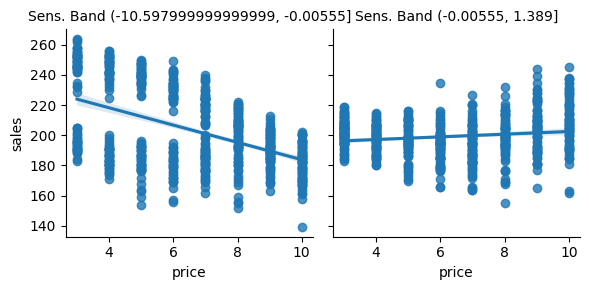

In [11]:
g = sns.FacetGrid(bands_df, col="sens_band")
g.map_dataframe(sns.regplot, x="price", y="sales")
g.set_titles(col_template="Sens. Band {col_name}");

As we can see, it looks like this partitioning scheme is useful. For the first partition, there is a high price sensitivity. Sales are going down by a lot as prices go up. However, for the second partition, sales remain roughly unchanged as the price goes up. In fact, it even looks like sales are going up as we increase the price, but that's probably noise. 
 
Contrast this with the partitions made using the ML prediction model:

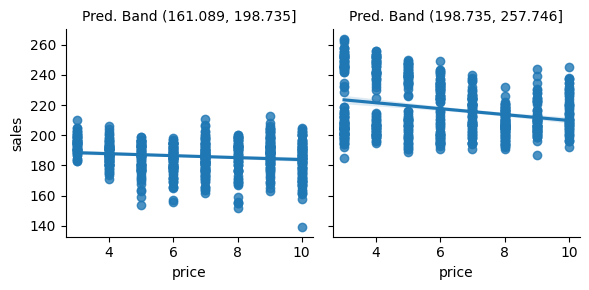

In [12]:
g = sns.FacetGrid(bands_df, col="pred_band")
g.map_dataframe(sns.regplot, x="price", y="sales")
g.set_titles(col_template="Pred. Band {col_name}");

I really like this plot because it conveys a very important point. As you can see, the predictive model partitions are splitting the units on the y axis. On days like those in the first partition, we don't sell a lot of ice cream, but we do sell more on days like those in the second partition. I find this amazing because the prediction model is doing exactly what it is supposed to do: it predicts sales. It can distinguish between days where there will be low versus high ice cream sales. 
 
The only problem is that prediction is not particularly useful here. Ultimately, we want to know when we can increase prices and when we can't. But once we look at the slopes of the lines in the predictive model partitions, we see that they don't change much. In other words, both partitions, as defined by the prediction model, have about the same responsiveness to price increase. This doesn't offer us much insight into which are the days we can increase prices, since it looks like price is not affecting sales at all. 
 
## Key Ideas
 
We finally formalized the concept of Conditional Average Treatment Effect and how it can be useful for personalisation. Namely, if we can understand how each unit responds to a treatment, that is, if we can understand the heterogeneity of the treatment effect, we can give the best treatment depending on the unit's individual characteristics.
 
We've also contrasted this goal with that of a predictive model. Namely, we are rethinking the estimation task, from predicting $Y$ in it's raw format to predicting how $Y$ changes with $T$, $\frac{\delta y}{\delta t}$. 
 
Sadly, it's not at all obvious how to build models for that. Since we can't observe sensitivity directly, it's hard to make a model that predicts it. But linear regression came to our rescue. By using a regression model that is fitted to predict $Y$, we found a way to also predict $\frac{\delta y}{\delta t}$. We also had to include interaction terms of the treatment and the features. This made it so that our sensitivity prediction was different for each customer. In other words, we were now estimating $E[Y'(t) | X]$. Those sensitivity predictions were then used to group our units into more or less sensitive to the treatment, ultimately helping us decide the treatment level for each group.
 
![img](./data/img/causal-model/economists.png)
 
One natural question that arises from all this is if we can replace the linear regression by a generic machine learning model and use that to predict sensitivity. The answer is yes, but there are some caveats. This chapter used a very simple CATE model because I think it's easier to understand the concept behind them with linear regression. Don't worry, though. We will see some more sophisticated models in the chapters to come. But before that, I first need to cover a very important topic, which is how can we compare two CATE models and decide which one is better. 
 
## References 
 
The things I've written here are mostly stuff from my head. I've learned them through experience. This means there isn't a direct reference I can point you to. It also means that the things I wrote here have **not** passed the academic scrutiny that good science often goes through. Instead, notice how I'm talking about things that work in practice, but I don't spend too much time explaining why that is the case. It's a sort of science from the streets, if you will. However, I am putting this up for public scrutiny, so, by all means, if you find something preposterous, open an issue and I'll address it to the best of my efforts.
 
## Contribute
 
Causal Inference for the Brave and True is an open-source material on causal inference, the statistics of science. It uses only free software, based in Python. Its goal is to be accessible monetarily and intellectually.
If you found this book valuable and you want to support it, please go to [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). If you are not ready to contribute financially, you can also help by fixing typos, suggesting edits or giving feedback on passages you didn't understand. Just go to the book's repository and [open an issue](https://github.com/matheusfacure/python-causality-handbook/issues). Finally, if you liked this content, please share it with others who might find it useful and give it a [star on GitHub](https://github.com/matheusfacure/python-causality-handbook/stargazers).